In [1]:
import matplotlib.pyplot as plt

In [2]:
import os, sys
import numpy as np
from tqdm import tqdm
import pandas as pd

In [3]:
def get_pairs(pair_dir, loc_which, num_iter):
    target_dir = os.path.join(pair_dir, loc_which)
    pairs = {}
    for i in tqdm(range(num_iter)):
        df = pd.read_csv(os.path.join(pair_dir,"{}/{}.pairs.csv".format(loc_which, i)), sep =";", header = None)
        pairs[i] = df
        pairs[i][0] = [eval(v) for v in pairs[i][0]]
        
    return pairs

In [4]:
def compute_roc_auc(loc_df, gts, idx_to_tl = None):
    from sklearn.metrics import auc

    recall_per_ranks = []
    
    if idx_to_tl is not None:
        _gts = []
        for gt in gts:
            if gt[0] == idx_to_tl:
                _gts.append(gt)
        gts = _gts
        
        indices = [i for i,v in enumerate(loc_df[0].values) if v[0] == idx_to_tl]
        loc_df = loc_df.iloc[indices]
    
    num = len(loc_df)
    num_gts = len(gts)
    
    #print (num, num_gts)
    ranks_of_gts = loc_df.loc[loc_df[0].isin(gts)][1].values
    #print ("range", np.min(ranks_of_gts), np.median(ranks_of_gts), np.max(ranks_of_gts))
    #print ("\t", ranks_of_gts[:10])
    recall_per_ranks = []
    for i in range(num):
        r = loc_df.iloc[i][1]
        cnt = np.sum(ranks_of_gts <= r)
        #print (r, cnt)
        recall_per_ranks.append(cnt/num_gts)
        
    xs = np.arange(num)
    auc_score = auc(xs, recall_per_ranks)
    
    return auc_score, list(zip(xs, recall_per_ranks))

In [5]:
import pickle

c10_gts_dir = "data/gts/rq1/only_first/cifar10"
c10_gts_only_first = {}
for i in range(30):
    df = pd.read_pickle("data/gts/rq1/only_first/cifar10/rq1.seed{}.gts.pkl".format(i))
    #with open("data/gts/rq1/cifar10/rq1.seed{}.gts.pkl".format(i), 'rb') as f:
    #    df = pickle.load(f)
    gt_lst = []
    for l in df.keys():
        gt_lst.extend([(l,idx) for idx in df[l]])
    
    c10_gts_only_first[i] = gt_lst

In [6]:
import pickle

c10_gts_dir = "data/gts/rq1/only_last/cifar10"
c10_gts_only_last = {}
for i in range(30):
    df = pd.read_pickle("data/gts/rq1/only_last/cifar10/rq1.seed{}.gts.pkl".format(i))
    #with open("data/gts/rq1/cifar10/rq1.seed{}.gts.pkl".format(i), 'rb') as f:
    #    df = pickle.load(f)
    gt_lst = []
    for l in df.keys():
        gt_lst.extend([(l,idx) for idx in df[l]])
    
    c10_gts_only_last[i] = gt_lst

In [7]:
import pickle

fm_gts_dir = "data/gts/rq1/only_first/fashion_mnist"
fm_gts_only_first = {}
for i in range(30):
    df = pd.read_pickle("data/gts/rq1/only_first/fashion_mnist/rq1.seed{}.gts.pkl".format(i))
    #with open("data/gts/rq1/cifar10/rq1.seed{}.gts.pkl".format(i), 'rb') as f:
    #    df = pickle.load(f)
    gt_lst = []
    for l in df.keys():
        gt_lst.extend([(l,idx) for idx in df[l]])
    
    fm_gts_only_first[i] = gt_lst

In [8]:
import pickle

fm_gts_dir = "data/gts/rq1/only_last/fashion_mnist"
fm_gts_only_last = {}
for i in range(30):
    df = pd.read_pickle("data/gts/rq1/only_last/fashion_mnist/rq1.seed{}.gts.pkl".format(i))
    #with open("data/gts/rq1/cifar10/rq1.seed{}.gts.pkl".format(i), 'rb') as f:
    #    df = pickle.load(f)
    gt_lst = []
    for l in df.keys():
        gt_lst.extend([(l,idx) for idx in df[l]])
    
    fm_gts_only_last[i] = gt_lst

In [9]:
c10_pair_dir = "results/rq1/all_layers/simple_cm/pairs"
c10_only_last_pair_dir = "results/rq1/only_last/cm/pairs"
c10_only_first_pair_dir = "results/rq1/only_first/cm/pairs"

In [10]:
fm_pair_dir = "results/rq1/all_layers/simple_fm/pairs"
fm_only_last_pair_dir = "results/rq1/only_last/fm/pairs"
fm_only_first_pair_dir = "results/rq1/only_first/fm/pairs"

In [18]:
c10_loc_pairs = get_pairs(c10_pair_dir, 'localiser', 30)

100%|██████████| 30/30 [02:36<00:00,  5.22s/it]


In [11]:
c10_only_last_loc_pairs = get_pairs(c10_only_last_pair_dir, 'localiser', 30)
c10_only_first_loc_pairs = get_pairs(c10_only_first_pair_dir, 'localiser', 30)

100%|██████████| 30/30 [00:00<00:00, 131.48it/s]


In [12]:
c10_only_last_gl_pairs = get_pairs(c10_only_last_pair_dir, 'gradient_loss', 30)
c10_only_first_gl_pairs = get_pairs(c10_only_first_pair_dir, 'gradient_loss', 30)

100%|██████████| 30/30 [00:00<00:00, 132.66it/s]


In [13]:
c10_only_last_rd_pairs = get_pairs(c10_only_last_pair_dir, 'random', 30)
c10_only_first_rd_pairs = get_pairs(c10_only_first_pair_dir, 'random', 30)

100%|██████████| 30/30 [00:00<00:00, 136.87it/s]


In [14]:
fm_only_last_loc_pairs = get_pairs(fm_only_last_pair_dir, 'localiser', 30)
fm_only_first_loc_pairs = get_pairs(fm_only_first_pair_dir, 'localiser', 30)

100%|██████████| 30/30 [00:21<00:00,  1.41it/s]


In [15]:
fm_only_last_gl_pairs = get_pairs(fm_only_last_pair_dir, 'gradient_loss', 30)
fm_only_first_gl_pairs = get_pairs(fm_only_first_pair_dir, 'gradient_loss', 30)

100%|██████████| 30/30 [00:21<00:00,  1.43it/s]


In [16]:
fm_only_last_rd_pairs = get_pairs(fm_only_last_pair_dir, 'random', 30)
fm_only_first_rd_pairs = get_pairs(fm_only_first_pair_dir, 'random', 30)

100%|██████████| 30/30 [00:21<00:00,  1.41it/s]


In [64]:
seed = 29

In [65]:
c10_only_last_outputs_loc = compute_roc_auc(c10_only_last_loc_pairs[seed], c10_gts_only_last[seed])
c10_only_last_outputs_gl = compute_roc_auc(c10_only_last_gl_pairs[seed], c10_gts_only_last[seed])
c10_only_last_outputs_rd = compute_roc_auc(c10_only_last_rd_pairs[seed], c10_gts_only_last[seed])

In [18]:
c10_only_last_outputs_gl_lst = []
c10_only_last_outputs_loc_lst = []
c10_only_last_outputs_rd_lst = []
for i in range(30):
    c10_only_last_outputs_loc_lst.append(compute_roc_auc(c10_only_last_loc_pairs[i], c10_gts_only_last[i])[1])
    c10_only_last_outputs_gl_lst.append(compute_roc_auc(c10_only_last_gl_pairs[i], c10_gts_only_last[i])[1])
    c10_only_last_outputs_rd_lst.append(compute_roc_auc(c10_only_last_rd_pairs[i], c10_gts_only_last[i])[1])

In [66]:
c10_only_first_outputs_loc = compute_roc_auc(c10_only_first_loc_pairs[seed], c10_gts_only_first[seed])
c10_only_first_outputs_gl = compute_roc_auc(c10_only_first_gl_pairs[seed], c10_gts_only_first[seed])
c10_only_first_outputs_rd = compute_roc_auc(c10_only_first_rd_pairs[seed], c10_gts_only_first[seed])

In [19]:
c10_only_first_outputs_gl_lst = []
c10_only_first_outputs_loc_lst = []
c10_only_first_outputs_rd_lst = []
for i in range(30):
    c10_only_first_outputs_loc_lst.append(compute_roc_auc(c10_only_first_loc_pairs[i], c10_gts_only_first[i])[1])
    c10_only_first_outputs_gl_lst.append(compute_roc_auc(c10_only_first_gl_pairs[i], c10_gts_only_first[i])[1])
    c10_only_first_outputs_rd_lst.append(compute_roc_auc(c10_only_first_rd_pairs[i], c10_gts_only_first[i])[1])

In [67]:
fm_only_last_outputs_loc = compute_roc_auc(fm_only_last_loc_pairs[seed], fm_gts_only_last[seed])
fm_only_last_outputs_gl = compute_roc_auc(fm_only_last_gl_pairs[seed], fm_gts_only_last[seed])
fm_only_last_outputs_rd = compute_roc_auc(fm_only_last_rd_pairs[seed], fm_gts_only_last[seed])

In [20]:
fm_only_last_outputs_gl_lst = []
fm_only_last_outputs_loc_lst = []
fm_only_last_outputs_rd_lst = []
for i in range(30):
    fm_only_last_outputs_loc_lst.append(compute_roc_auc(fm_only_last_loc_pairs[i], fm_gts_only_last[i])[1])
    fm_only_last_outputs_gl_lst.append(compute_roc_auc(fm_only_last_gl_pairs[i], fm_gts_only_last[i])[1])
    fm_only_last_outputs_rd_lst.append(compute_roc_auc(fm_only_last_rd_pairs[i], fm_gts_only_last[i])[1])

In [68]:
fm_only_first_outputs_loc = compute_roc_auc(fm_only_first_loc_pairs[seed], fm_gts_only_first[seed])
fm_only_first_outputs_gl = compute_roc_auc(fm_only_first_gl_pairs[seed], fm_gts_only_first[seed])
fm_only_first_outputs_rd = compute_roc_auc(fm_only_first_rd_pairs[seed], fm_gts_only_first[seed])

In [49]:
fm_only_first_outputs_gl_lst = []
fm_only_first_outputs_loc_lst = []
fm_only_first_outputs_rd_lst = []
for i in range(30):
    fm_only_first_outputs_loc_lst.append(compute_roc_auc(fm_only_first_loc_pairs[i], fm_gts_only_first[i])[1])
    fm_only_first_outputs_gl_lst.append(compute_roc_auc(fm_only_first_gl_pairs[i], fm_gts_only_first[i])[1])
    fm_only_first_outputs_rd_lst.append(compute_roc_auc(fm_only_first_rd_pairs[i], fm_gts_only_first[i])[1])

In [44]:
def plot_results(xs, ys_loc, ys_gl, ys_rd):
    """
    """
    colors = ['r', 'b', 'g']
    labels = ['loc', 'gl', 'rd']
    ys = [ys_loc, ys_gl, ys_rd]

    for i in range(3):
        y_mean = np.mean(ys[i], axis = 0)
        y_std = np.std(ys[i], axis = 0)
        y_std_up = y_mean + y_std
        y_std_low = y_mean - y_std
        
        plt.plot(xs, y_mean, color = colors[i], linestyle = '-')
        plt.fill_between(xs, y_std_low, y_std_up, alpha = 0.2, color = colors[i], lw = 0, label = labels[i])
    
    plt.legend()
            

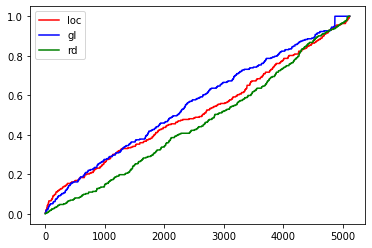

In [69]:
#import matplotlib.pyplot as plt

plt.plot([v[0] for v in c10_only_last_outputs_loc[1]], 
         [v[1] for v in c10_only_last_outputs_loc[1]], "r-", label='loc')
plt.plot([v[0] for v in c10_only_last_outputs_gl[1]], 
         [v[1] for v in c10_only_last_outputs_gl[1]], "b-", label='gl')
plt.plot([v[0] for v in c10_only_last_outputs_rd[1]], 
         [v[1] for v in c10_only_last_outputs_rd[1]], "g-", label='rd')

plt.legend()
plt.show()

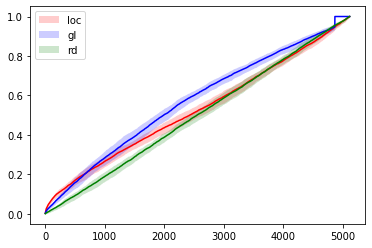

In [45]:
xs = np.arange(len(c10_only_last_outputs_loc_lst[0]))
plot_results(xs, np.asarray(c10_only_last_outputs_loc_lst)[:,:,1], 
             np.asarray(c10_only_last_outputs_gl_lst)[:,:,1], 
             np.asarray(c10_only_last_outputs_rd_lst)[:,:,1])

In [37]:
np.asarray(c10_only_last_outputs_loc_lst)[:,:,1]

array([[0.00363636, 0.00363636, 0.00727273, ..., 0.99636364, 0.99636364,
        1.        ],
       [0.        , 0.00414938, 0.00829876, ..., 0.99585062, 1.        ,
        1.        ],
       [0.00393701, 0.00393701, 0.00787402, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.00383142, 0.00383142, 0.00766284, ..., 1.        , 1.        ,
        1.        ],
       [0.00377358, 0.00754717, 0.01132075, ..., 1.        , 1.        ,
        1.        ],
       [0.00367647, 0.00367647, 0.00367647, ..., 0.99632353, 1.        ,
        1.        ]])

In [70]:
num = len(c10_only_last_outputs_loc[1])
c10_only_last_outputs_loc[0]/num, c10_only_last_outputs_gl[0]/num, c10_only_last_outputs_rd[0]/num

(0.5181931439568015, 0.5571263930376839, 0.4592033835018382)

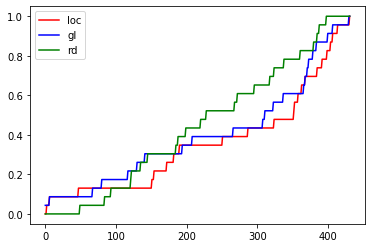

In [71]:
#import matplotlib.pyplot as plt

plt.plot([v[0] for v in c10_only_first_outputs_loc[1]], 
         [v[1] for v in c10_only_first_outputs_loc[1]], "r-", label='loc')
plt.plot([v[0] for v in c10_only_first_outputs_gl[1]], 
         [v[1] for v in c10_only_first_outputs_gl[1]], "b-", label='gl')
plt.plot([v[0] for v in c10_only_first_outputs_rd[1]], 
         [v[1] for v in c10_only_first_outputs_rd[1]], "g-", label='rd')

plt.legend()
plt.show()

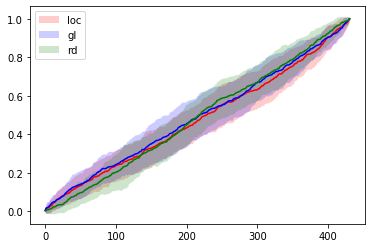

In [47]:
xs = np.arange(len(c10_only_first_outputs_loc_lst[0]))
plot_results(xs, 
             np.asarray(c10_only_first_outputs_loc_lst)[:,:,1], 
             np.asarray(c10_only_first_outputs_gl_lst)[:,:,1], 
             np.asarray(c10_only_first_outputs_rd_lst)[:,:,1])

In [72]:
num = len(c10_only_first_outputs_loc[1])
c10_only_first_outputs_loc[0]/num, c10_only_first_outputs_gl[0]/num, c10_only_first_outputs_rd[0]/num

(0.3555253623188406, 0.3983494363929147, 0.44560185185185186)

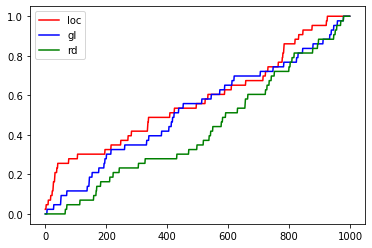

In [73]:
#import matplotlib.pyplot as plt

plt.plot([v[0] for v in fm_only_last_outputs_loc[1]], 
         [v[1] for v in fm_only_last_outputs_loc[1]], "r-", label='loc')
plt.plot([v[0] for v in fm_only_last_outputs_gl[1]], 
         [v[1] for v in fm_only_last_outputs_gl[1]], "b-", label='gl')
plt.plot([v[0] for v in fm_only_last_outputs_rd[1]], 
         [v[1] for v in fm_only_last_outputs_rd[1]], "g-", label='rd')

plt.legend()
plt.show()

In [74]:
num = len(fm_only_last_outputs_loc[1])
fm_only_last_outputs_loc[0]/num, fm_only_last_outputs_gl[0]/num, fm_only_last_outputs_rd[0]/num

(0.5765348837209302, 0.5255697674418605, 0.4288720930232558)

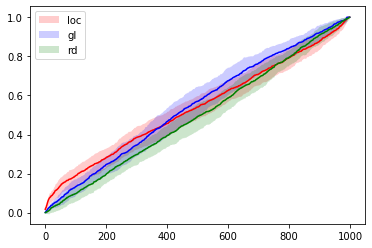

In [48]:
xs = np.arange(len(fm_only_last_outputs_loc_lst[0]))
plot_results(xs, 
             np.asarray(fm_only_last_outputs_loc_lst)[:,:,1], 
             np.asarray(fm_only_last_outputs_gl_lst)[:,:,1], 
             np.asarray(fm_only_last_outputs_rd_lst)[:,:,1])

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


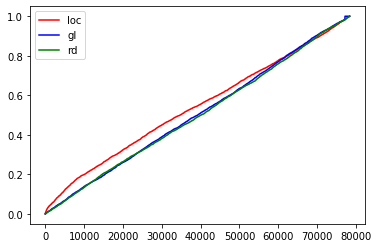

In [75]:
#import matplotlib.pyplot as plt

plt.plot([v[0] for v in fm_only_first_outputs_loc[1]], 
         [v[1] for v in fm_only_first_outputs_loc[1]], "r-", label='loc')
plt.plot([v[0] for v in fm_only_first_outputs_gl[1]], 
         [v[1] for v in fm_only_first_outputs_gl[1]], "b-", label='gl')
plt.plot([v[0] for v in fm_only_first_outputs_rd[1]], 
         [v[1] for v in fm_only_first_outputs_rd[1]], "g-", label='rd')

plt.legend()
plt.show()

In [76]:
num = len(fm_only_first_outputs_loc[1])
fm_only_first_outputs_loc[0]/num, fm_only_first_outputs_gl[0]/num, fm_only_first_outputs_rd[0]/num

(0.5388819629530918, 0.5039243974642096, 0.49874417453548586)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


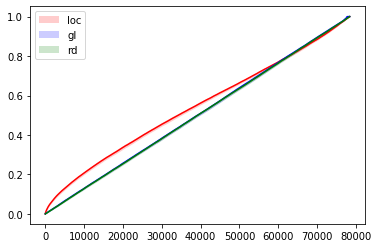

In [51]:
xs = np.arange(len(fm_only_first_outputs_loc_lst[0]))
plot_results(xs, 
             np.asarray(fm_only_first_outputs_loc_lst)[:,:,1], 
             np.asarray(fm_only_first_outputs_gl_lst)[:,:,1], 
             np.asarray(fm_only_first_outputs_rd_lst)[:,:,1])

In [38]:
c10_only_last_outputs_loc

(2645.9345454545455,
 [(0, 0.0036363636363636364),
  (1, 0.0036363636363636364),
  (2, 0.007272727272727273),
  (3, 0.01090909090909091),
  (4, 0.01090909090909091),
  (5, 0.014545454545454545),
  (6, 0.014545454545454545),
  (7, 0.014545454545454545),
  (8, 0.01818181818181818),
  (9, 0.02181818181818182),
  (10, 0.02181818181818182),
  (11, 0.02181818181818182),
  (12, 0.025454545454545455),
  (13, 0.025454545454545455),
  (14, 0.02909090909090909),
  (15, 0.03272727272727273),
  (16, 0.03272727272727273),
  (17, 0.03272727272727273),
  (18, 0.03272727272727273),
  (19, 0.03272727272727273),
  (20, 0.03272727272727273),
  (21, 0.03272727272727273),
  (22, 0.03272727272727273),
  (23, 0.03272727272727273),
  (24, 0.03272727272727273),
  (25, 0.03272727272727273),
  (26, 0.03272727272727273),
  (27, 0.03272727272727273),
  (28, 0.03272727272727273),
  (29, 0.03272727272727273),
  (30, 0.03272727272727273),
  (31, 0.03272727272727273),
  (32, 0.03272727272727273),
  (33, 0.0363636363636

In [27]:
target_layers = sorted(list(set([vs[0] for vs in fm_gts_only_last[0]])))
target_layers

[3]

In [28]:
target_layers = sorted(list(set([vs[0] for vs in fm_gts_only_first[0]])))
target_layers

[1]

In [49]:
c10_gts[0]

[(2, (0, 0, 0, 10)),
 (2, (0, 0, 1, 8)),
 (2, (0, 0, 2, 2)),
 (2, (0, 1, 0, 4)),
 (2, (0, 1, 0, 11)),
 (2, (0, 2, 0, 6)),
 (2, (0, 2, 0, 11)),
 (2, (0, 2, 2, 0)),
 (2, (1, 0, 0, 10)),
 (2, (1, 0, 2, 7)),
 (2, (1, 0, 2, 15)),
 (2, (1, 1, 0, 14)),
 (2, (1, 1, 2, 3)),
 (2, (1, 2, 1, 4)),
 (2, (1, 2, 1, 5)),
 (2, (2, 0, 1, 9)),
 (2, (2, 0, 1, 15)),
 (2, (2, 1, 1, 2)),
 (2, (2, 1, 1, 10)),
 (2, (2, 1, 1, 15)),
 (2, (2, 1, 2, 1)),
 (2, (2, 1, 2, 12)),
 (2, (2, 2, 0, 0)),
 (2, (2, 2, 0, 13)),
 (2, (2, 2, 1, 14)),
 (2, (2, 2, 2, 13)),
 (7, (0, 23)),
 (7, (0, 33)),
 (7, (0, 37)),
 (7, (0, 44)),
 (7, (0, 72)),
 (7, (0, 120)),
 (7, (0, 132)),
 (7, (0, 170)),
 (7, (0, 237)),
 (7, (0, 239)),
 (7, (0, 242)),
 (7, (0, 263)),
 (7, (0, 275)),
 (7, (0, 282)),
 (7, (0, 299)),
 (7, (0, 309)),
 (7, (0, 310)),
 (7, (0, 311)),
 (7, (0, 328)),
 (7, (0, 388)),
 (7, (0, 398)),
 (7, (0, 406)),
 (7, (0, 409)),
 (7, (0, 415)),
 (7, (0, 446)),
 (7, (0, 459)),
 (7, (0, 469)),
 (7, (0, 476)),
 (7, (0, 490)),
 (7, (1,

In [86]:
c10_loc_pairs[0].iloc[[i for i,v in enumerate(c10_loc_pairs[0][0].values) if v[0] == target_layers[-1]]].iloc[0][1]

6

In [70]:
c10_loc_pairs[0].iloc[5]

0    (9, (312, 0))
1                6
Name: 5, dtype: object

In [127]:
num_last = np.sum([idx[0] == target_layers[1] for idx in c10_loc_pairs[0][0].values])
num_last

524288

In [19]:
c10_gl_pairs = get_pairs(c10_pair_dir, 'gradient_loss', 30)

100%|██████████| 30/30 [02:33<00:00,  5.11s/it]


In [20]:
c10_rd_pairs = get_pairs(c10_pair_dir, 'random', 30)

100%|██████████| 30/30 [02:23<00:00,  4.77s/it]


In [113]:
c10_gts[0]

[(2, (0, 0, 0, 10)),
 (2, (0, 0, 1, 8)),
 (2, (0, 0, 2, 2)),
 (2, (0, 1, 0, 4)),
 (2, (0, 1, 0, 11)),
 (2, (0, 2, 0, 6)),
 (2, (0, 2, 0, 11)),
 (2, (0, 2, 2, 0)),
 (2, (1, 0, 0, 10)),
 (2, (1, 0, 2, 7)),
 (2, (1, 0, 2, 15)),
 (2, (1, 1, 0, 14)),
 (2, (1, 1, 2, 3)),
 (2, (1, 2, 1, 4)),
 (2, (1, 2, 1, 5)),
 (2, (2, 0, 1, 9)),
 (2, (2, 0, 1, 15)),
 (2, (2, 1, 1, 2)),
 (2, (2, 1, 1, 10)),
 (2, (2, 1, 1, 15)),
 (2, (2, 1, 2, 1)),
 (2, (2, 1, 2, 12)),
 (2, (2, 2, 0, 0)),
 (2, (2, 2, 0, 13)),
 (2, (2, 2, 1, 14)),
 (2, (2, 2, 2, 13)),
 (7, (0, 23)),
 (7, (0, 33)),
 (7, (0, 37)),
 (7, (0, 44)),
 (7, (0, 72)),
 (7, (0, 120)),
 (7, (0, 132)),
 (7, (0, 170)),
 (7, (0, 237)),
 (7, (0, 239)),
 (7, (0, 242)),
 (7, (0, 263)),
 (7, (0, 275)),
 (7, (0, 282)),
 (7, (0, 299)),
 (7, (0, 309)),
 (7, (0, 310)),
 (7, (0, 311)),
 (7, (0, 328)),
 (7, (0, 388)),
 (7, (0, 398)),
 (7, (0, 406)),
 (7, (0, 409)),
 (7, (0, 415)),
 (7, (0, 446)),
 (7, (0, 459)),
 (7, (0, 469)),
 (7, (0, 476)),
 (7, (0, 490)),
 (7, (1,

In [22]:
c10_outputs_loc = compute_roc_auc(c10_loc_pairs[0], c10_gts[0])

In [128]:
c10_outputs_loc_last = compute_roc_auc(c10_loc_pairs[0], c10_gts[0], idx_to_tl = target_layers[1])

KeyboardInterrupt: 

In [121]:
c10_outputs_loc_last[0]/num_last

0.4277955840455841

In [28]:
num = len(c10_loc_pairs[0])

In [65]:
num_last

5120

In [66]:
c10_outputs_loc_last[0]

409982.4409594096

In [96]:
c10_outputs_loc[0]/num
c10_outputs_loc_last[0]/num_last

0.47323678217250925

In [23]:
c10_outputs_gl = compute_roc_auc(c10_gl_pairs[0], c10_gts[0])

In [124]:
c10_outputs_gl_last = compute_roc_auc(c10_gl_pairs[0], c10_gts[0], idx_to_tl = target_layers[0])

In [125]:
c10_outputs_gl[0]/num
c10_outputs_gl_last[0]/num_last

0.4308671652421652

In [24]:
c10_outputs_rd = compute_roc_auc(c10_rd_pairs[0], c10_gts[0])

In [95]:
c10_outputs_rd_last = compute_roc_auc(c10_rd_pairs[0], c10_gts[0], idx_to_tl = target_layers[-1])

In [98]:
c10_outputs_rd[0]/num
c10_outputs_rd_last[0]/num_last

0.46847721113929897

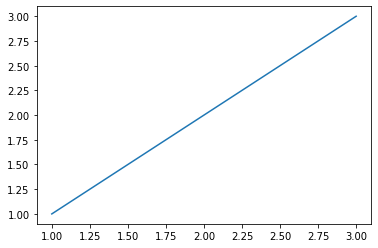

In [2]:
plt.plot([1,2,3], [1,2,3])

In [3]:
import pickle

In [4]:
with open("loc.pkl", 'rb') as f:
    c10_outputs_loc = pickle.load(f)

In [7]:
c10_outputs_loc

[(0, 0.0),
 (1, 3.7956426022925684e-05),
 (2, 3.7956426022925684e-05),
 (3, 3.7956426022925684e-05),
 (4, 3.7956426022925684e-05),
 (5, 3.7956426022925684e-05),
 (6, 3.7956426022925684e-05),
 (7, 3.7956426022925684e-05),
 (8, 3.7956426022925684e-05),
 (9, 3.7956426022925684e-05),
 (10, 3.7956426022925684e-05),
 (11, 3.7956426022925684e-05),
 (12, 3.7956426022925684e-05),
 (13, 3.7956426022925684e-05),
 (14, 7.591285204585137e-05),
 (15, 7.591285204585137e-05),
 (16, 7.591285204585137e-05),
 (17, 7.591285204585137e-05),
 (18, 7.591285204585137e-05),
 (19, 7.591285204585137e-05),
 (20, 7.591285204585137e-05),
 (21, 7.591285204585137e-05),
 (22, 7.591285204585137e-05),
 (23, 7.591285204585137e-05),
 (24, 7.591285204585137e-05),
 (25, 7.591285204585137e-05),
 (26, 7.591285204585137e-05),
 (27, 7.591285204585137e-05),
 (28, 7.591285204585137e-05),
 (29, 7.591285204585137e-05),
 (30, 7.591285204585137e-05),
 (31, 7.591285204585137e-05),
 (32, 7.591285204585137e-05),
 (33, 0.00011386927806877

In [5]:
with open("gl.pkl", 'rb') as f:
    c10_outputs_gl = pickle.load(f)
    
with open("rd.pkl", 'rb') as f:
    c10_outputs_rd = pickle.load(f)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


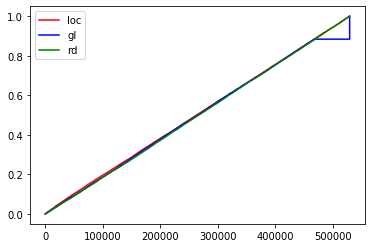

In [33]:
#import matplotlib.pyplot as plt

plt.plot([v[0] for v in c10_outputs_loc[1]], [v[1] for v in c10_outputs_loc[1]], "r-", label='loc')
plt.plot([v[0] for v in c10_outputs_gl[1]], [v[1] for v in c10_outputs_gl[1]], "b-", label='gl')
plt.plot([v[0] for v in c10_outputs_rd[1]], [v[1] for v in c10_outputs_rd[1]], "g-", label='rd')

plt.legend()
plt.show()

... maybe the artificial faults might be wrong ... and the neural weights to patch and the neural weights responsible for the failure might be different. 
-> can we show this by comparing the latter goal's results from the implementation of "suspicious neural weights" using DeepFL

although I have look through the localisation results of each layer, nothing interseting has been found. 